# Bi-Archetype Analysis

In [1]:
import archetypes as arch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_checkerboard

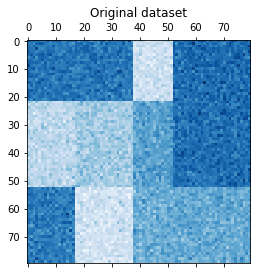

In [2]:
random_state = np.random.RandomState(12)

n_archetypes = (3, 4)
data, rows, columns = make_checkerboard(
    shape=(80, 80),
    n_clusters=n_archetypes,
    shuffle=False,
    noise=10,
    random_state=random_state,
)

plt.matshow(data, cmap=plt.cm.Blues)
plt.title("Original dataset")
plt.show()

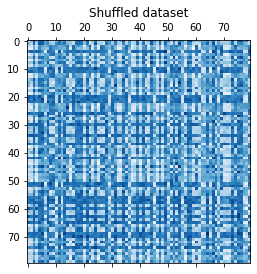

In [3]:
row_idx = random_state.permutation(data.shape[0])
col_idx = random_state.permutation(data.shape[1])
data = data[row_idx][:, col_idx]

plt.matshow(data, cmap=plt.cm.Blues)
plt.title("Shuffled dataset")
plt.show()

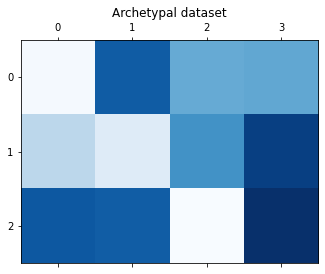

In [4]:
model = arch.BiAA(n_archetypes=(3, 4), n_init=5, max_iter=10_000)
model.fit(data)

plt.matshow(model.archetypes_, cmap=plt.cm.Blues)
plt.title("Archetypal dataset")
plt.show()

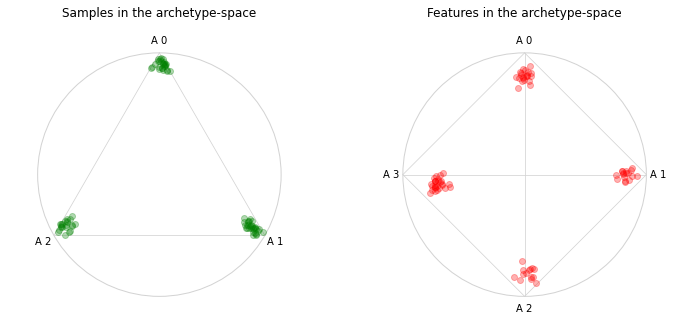

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 7))

axes[0].set_title("Samples in the archetype-space")
arch.simplex(model.alphas_, alpha=0.3, color="green", ax=axes[0])
axes[1].set_title("Features in the archetype-space")
arch.simplex(model.gammas_.T, alpha=0.3, color="red", ax=axes[1])
plt.show()